# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 9 Fourier Transform
The Fourier transform is one of the most useful tools in physics. It allows us to break down
functions or signals into their component parts and analyze, smooth and filter them,
and it gives us a way to rapidly perform certain kindds of calculations and solve them,
such as diffusion equation or the Schrodinger equation.

## 9.1 Fourier series
A periodic function $f(x)$ defined on a finite interval $0<x<L$ can be written as a _Fourier series_.
There are sereval kinds of Fourier series. 

- Symmetric
$$f(x) = \sum_{k=0}^{\infty}\alpha_k \text{cos}(\frac{2\pi kx}{L})$$

- Antisymmetric
$$f(x) = \sum_{k=0}^{\infty}\beta_k \text{sin}(\frac{2\pi kx}{L})$$

- General 
$$f(x) = \sum_{k=0}^{\infty}\alpha_k \text{cos}(\frac{2\pi kx}{L}) + \sum_{k=0}^{\infty}\beta_k \text{sin}(\frac{2\pi kx}{L})$$


where $\alpha_k$ and $\beta_k$ are a set of coefficients whose values depend on the shape of the function.

Sometimes, we also use expoential function to represent sine and cosine waves.

According to the Euler's formula,

$$e^{i\theta} = \cos\theta + i\sin\theta $$
$$\cos\theta=\frac{1}{2}(e^{-i\theta} + e^{i\theta})$$
$$\sin\theta=\frac{1}{2}i(e^{-i\theta} - e^{i\theta})$$

$$f(x) = \sum_{k=-\infty}^{+\infty} \gamma_k \exp{i\frac{2\pi kx}{L}}$$
where

$$
\gamma_k =
\begin{cases}
1/2(\alpha_{-k} + i\beta_{-k}), & \text{if } k<0,\\
\alpha_0,                       & \text{if } k=0,\\
1/2(\alpha_{k} + i\beta_{k}),   & \text{if } k>0.
\end{cases}
$$

The coefficients $\gamma_k$ are generally complex, which could be calculated from the integral.
$$\gamma_k = \frac{1}{L}\int_0^Lf(x)\exp(-i\frac{2\pi kx}{L})dx$$

We shall deal with the integral in the following sections.



## 9.2 Discrete Fourier transform
For some functions $f(x)$ can be performed analytically, thus one could obtain the exact values the integral,
and then $\gamma_k$.
However, in many cases, we don't even know the exact analytic form of the function. For instance, it may be
a signal measured in a lab or output of a computer program. Hence we need to deal with a lot of functions numerically. 

Recall we just learned the trapezoidal rule to evaluate the integral.

$$\gamma_k = \frac{1}{L}\frac{L}{N}[\frac{1}{2}f(0)+\frac{1}{2}f(L)+\sum_{n=1}^{N-1}f(x_n)\exp(-i\frac{2\pi kx_n}{L})]$$

Where the positions $x_n=\frac{n}{N}L$

but since $f(x)$ is by hypothesis periodic we have $f(L)=f(0)$ and therefore
$$\gamma_k = \frac{1}{N}\sum_{n=0}^{N-1}f(x_n)\exp(-i\frac{2\pi kx_n}{L})$$

We can just use this formula to compute $\gamma_k$. In practice, {$x_n, f(x_n)$} could be the equally spaced
sampled points {$x_n, y_n$}. All we need to know are the sample values $y_n$ and the total number of samples $N$.

The sum is a standard quantity that appears in many calculations. It is known as the _discrete Fourier transform_
(DFT).

$$c_k = \sum_{n=0}^{N-1}y_n\exp(-i\frac{2\pi kn}{L})$$

The quantities $c_k$ and $\gamma_k$ differ by only a factor of $1/N$.



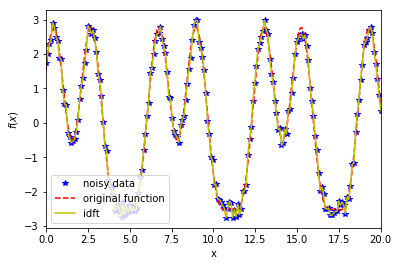

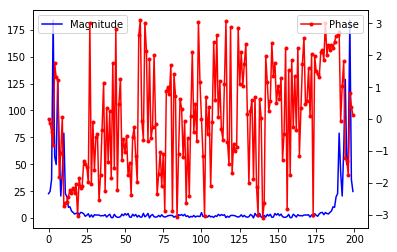

In [2]:
%matplotlib inline  


import matplotlib.pyplot as plt
import numpy as np
from cmath import exp, pi

def dft(y):
    '''
    This is a code to do decrete Fourier transform
    '''    
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

def idft(c):
    '''
    This is a code to do inverse Fourier transform
    '''
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*exp(2j*pi*k*n/N)
    return y

#define the function
f = lambda x: 2*np.sin(x) + 1.5*np.cos(2*x) + np.sin(3*x)

#define the paramters for the plot
a,b = 0,20
npoints = 200

#create the initial sample points (x,y)
x = np.linspace(a,b,npoints)
y = f(x) + 0.5*(np.random.rand(npoints) - 0.5)

#performat DFT and inverse dft calculations
c = dft(y)    
y1 = idft(c).real/npoints 

#make the plot
plt.plot(x,y, 'b*', label='noisy data')
plt.plot(x,f(x), 'r--', label='original function')
plt.plot(x,y1, 'y', label='idft')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()

#plot the points after DFT data
fig, ax1 = plt.subplots()
ax1.plot(np.abs(c), 'b-', label='Magnitude')

ax2 = ax1.twinx()
ax2.plot(np.angle(c), 'r.-', label='Phase')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [12]:
print(len(c[np.abs(c)>10]))

29


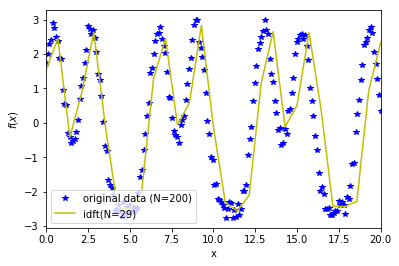

In [10]:
# From the above results, we can clearly see that the DFT coefficients has very uneven distributions.
# A few points has much larger magnitude than the rest. 
# What will happen if we just use these points to do the inverse DFT? 
# Can we recover the overall shape the data from them?

c2 = c[np.abs(c)>10]           # remove the small coefficients
y2 = idft(c2).real/npoints     # performa inverse DFT
x2 = np.linspace(a,b,len(y2))  # obtain the x sequence

plt.plot(x,y, 'b*', label='original data (N='+str(npoints)+')')
plt.plot(x2,y2, 'y', label='idft(N=' + str(len(c2)) + ')')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()

## 9.3 The Physical interpretation of FT
How do we understand the outcome of Fourier transform?

The Fourier transform breaks a function down into a set of real or complex sinusoidal waves.
Each term in a sum represents one wave with its own well-defined frequency. If the function
$f(x)$ is a function in space then we have spatial frequencies; say like musical notes.
Saying that any function can be expressed as a sume of waves of given frequencies, and the 
Fourier transform tells us what that sum is for any particular function. The coefficients 
of the transform tell us exactly how much of each frequency we have in the sum.

Thus, by looking at the output of our Fourier transform, we can get a picture of what the frequency
breakdown of a signal is. For example, consider the signal shown above. As we see, the signal
consists of three basic waves that go up and down with different frequency. But there is
all some noise in the data as well, visiable as smaller wiggles in the line. If one were to 
listen to this signal as sound one would hear a constant note at the frequency of the main wave,
accompanied by a background hiss that comes from the noise.

Since the coefficients retured by the transform in the array $c$ are in general complex, which could 
be expressed by the absolute values and angles. The absoulte values give us a measure of the amplitude
of each waves and the angle gives the phase of each Fourier series. The advantage of Fourier transform
is to conveniently capture the waves with significant contributions to the measurement and the noise
will only appear as a uniform random background.



## 9.4 DFT in python and its application
As a fundamental analysis tool, DFT is expectedly well supported in python as well. 
To use DFT, one just need to use the fft library in numpy
```python
from numpy import fft
c = fft.fft(x)   #here x is an array of your samples
```

- fft(a[, n, axis, norm])   Compute the one-dimensional discrete Fourier Transform.
- ifft(a[, n, axis, norm])  Compute the one-dimensional inverse discrete Fourier Transform.
- fft2(a[, s, axes, norm])  Compute the 2-dimensional discrete Fourier Transform
- ifft2(a[, s, axes, norm]) Compute the 2-dimensional inverse discrete Fourier Transform.
- fftn(a[, s, axes, norm])  Compute the N-dimensional discrete Fourier Transform.
- ifftn(a[, s, axes, norm]) Compute the N-dimensional inverse discrete Fourier Transform.

or the library of fftpack in scipy
```python
from scipy import fftpack
c = fftpack.fft(x)   #here x is an array of your samples
```

Why is called fft instead of dft? We will cover it in the next section.

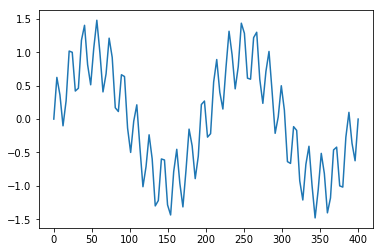

100


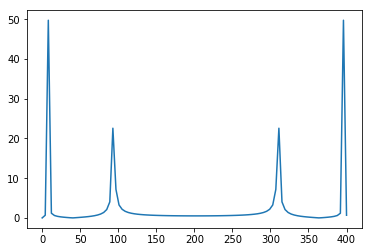

In [54]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.linspace(0.0, 400, N)
y = np.sin(50.0 * 2.0*np.pi*x)  + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,y)
plt.show() 

yf = np.fft.fft(y)
print(len(yf))
plt.plot(x,np.abs(yf))
#plt.grid()
plt.show() 

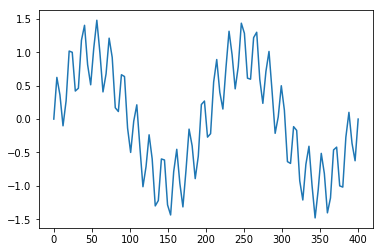

100


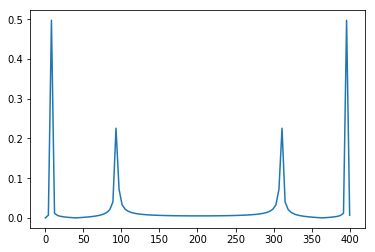

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.linspace(0.0, 400, N)
y = np.sin(50.0 * 2.0*np.pi*x)  + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,y)
plt.show() 

yf = np.fft.ifft(y)
print(len(yf))
plt.plot(x,np.abs(yf))
#plt.grid()
plt.show() 

## 9.5 Applications
DFT is very useful in technological applications. For example, they form the mathematical
basis for the computer image file format called _JPEG_, which is used store most of the images in digital
world. The simplist way of storing an image is just to store all these numbers. But this will result in
very large files. It turns out that one can store images far more econonimcally with the help of DFT.

The advantage of storing images in DFT is that in many cases most of the $c_k$ are very small and can
be neglected. Because only the small remainning fraction of the Fourier coefficients need to be stored.
the size of the file required to store the whole picture. Of course, since some data are thrown away,
the picture you get back on your screen isn't quite the same picture. But usually your eye can't tell
the difference.



## 9.6 Homework
### 1, From web
- 1, dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2, using Fourier transform to process the image and figure out how to compress the data.
- 3, compare it with the size which you obtained via plt.savefig()

### 2, Choose your own data or online data to play with DFT, IDFT and fitting with different functions.

